In [16]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
#Importing dataset from file "Winnipeg.txt" and storing into a data matrix

import numpy as np

data = np.loadtxt('/content/gdrive/My Drive/5th Semester/EC386/WinnipegDataset.txt', delimiter=',')

In [3]:
#Part 1: Balanced Training with 1000 samples of each class - Extracting the first 1000 samples from classes 1 to 7

class1_data = data[0:1000]
print('Data corresponding to class 1 : \n')
print(class1_data)
print('\n')

class2_data = data[39162:(39162+1000)]
print('Data corresponding to class 2 : \n')
print(class2_data)
print('\n')

class3_data = data[42760:(42760+1000)]
print('Data corresponding to class 3 : \n')
print(class3_data)
print('\n')

class4_data = data[118433:(118433+1000)]
print('Data corresponding to class 4 :  \n')
print(class4_data)
print('\n')

class5_data = data[192500:(192500+1000)]
print('Data corresponding to class 5 : \n')
print(class5_data)
print('\n')

class6_data = data[239617:(239617+1000)]
print('Data corresponding to class 6 : \n')
print(class6_data)
print('\n')

class7_data = data[324691:(324691+1000)]
print('Data corresponding to class 7 : \n')
print(class7_data)

Data corresponding to class 1 : 

[[  1.      -13.559   -21.407   ...   1.677     0.20988   0.65422]
 [  1.      -12.802   -20.335   ...   0.84869   0.50617  -0.18898]
 [  1.      -12.431   -19.902   ...   1.273     0.30864   0.10483]
 ...
 [  1.      -10.872   -18.415   ...   0.52971   0.65432   1.     ]
 [  1.      -10.885   -18.372   ...   1.3108    0.28395  -0.35   ]
 [  1.      -11.01    -18.387   ...  -0.        1.        1.     ]]


Data corresponding to class 2 : 

[[  2.      -10.667   -16.214   ...   1.3108    0.28395   0.7462 ]
 [  2.      -10.407   -16.281   ...   0.99503   0.40741   0.7462 ]
 [  2.      -10.027   -15.772   ...   1.5811    0.20988   0.6576 ]
 ...
 [  2.      -10.346   -15.258   ...   0.34883   0.80247   1.     ]
 [  2.      -10.297   -15.348   ...   0.34883   0.80247   1.     ]
 [  2.      -10.418   -15.564   ...  -0.        1.        1.     ]]


Data corresponding to class 3 : 

[[  3.      -13.199   -22.21    ...   1.0609    0.35802   0.37796]
 [  3.     

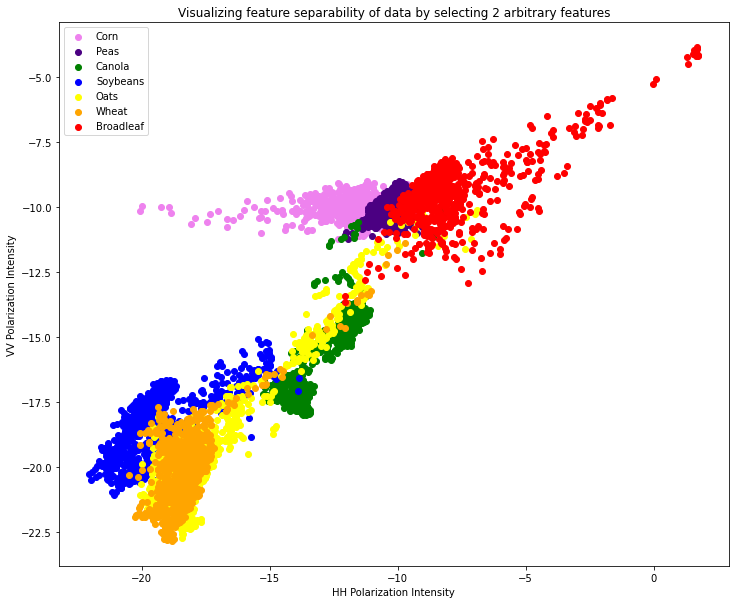

In [4]:
#Visualize data with respect to two features - hh and vv polarization intensities are chosen for this case

from matplotlib import pyplot as plt

plt.figure(figsize = (12, 10))

x1 = class1_data[:, 1]
y1 = class2_data[:, 3]
plt.scatter(x1, y1, color = 'violet', label = 'Corn')

x2 = class2_data[:, 1]
y2 = class2_data[:, 3]
plt.scatter(x2, y2, color = 'indigo', label = 'Peas')

x3 = class3_data[:, 1]
y3 = class3_data[:, 3]
plt.scatter(x3, y3, color = 'green', label = 'Canola')

x4 = class4_data[:, 1]
y4 = class4_data[:, 3]
plt.scatter(x4, y4, color = 'blue', label = 'Soybeans')

x5= class5_data[:, 1]
y5 = class5_data[:, 3]
plt.scatter(x5, y5, color = 'yellow', label = 'Oats')

x6 = class6_data[:, 1]
y6 = class6_data[:, 3]
plt.scatter(x6, y6, color = 'orange', label = 'Wheat')

x7 = class7_data[:, 1]
y7 = class7_data[:, 3]
plt.scatter(x7, y7, color = 'red', label = 'Broadleaf')

plt.xlabel('HH Polarization Intensity')
plt.ylabel('VV Polarization Intensity')
plt.title('Visualizing feature separability of data by selecting 2 arbitrary features')
plt.legend()

In [5]:
#Combine data extracted from previous step and randomize order for efficient training

balanced_training_data = np.vstack((class1_data, class2_data, class3_data, class4_data, class5_data, class6_data, class7_data))
print('Training Data before shuffling : \n')
print(balanced_training_data)
print('\n')

np.random.shuffle(balanced_training_data)
print('Training Data after shuffling : \n')
print(balanced_training_data)

Training Data before shuffling : 

[[  1.      -13.559   -21.407   ...   1.677     0.20988   0.65422]
 [  1.      -12.802   -20.335   ...   0.84869   0.50617  -0.18898]
 [  1.      -12.431   -19.902   ...   1.273     0.30864   0.10483]
 ...
 [  7.       -8.3716  -14.387   ...   0.34883   0.80247   1.     ]
 [  7.       -8.6966  -14.58    ...   0.96496   0.40741  -0.31623]
 [  7.       -8.701   -14.425   ...   1.3689    0.25926   0.1    ]]


Training Data after shuffling : 

[[  4.      -18.603   -30.008   ...   1.7351    0.18519   0.63246]
 [  4.      -18.926   -27.428   ...  -0.        1.        1.     ]
 [  2.      -10.02    -15.713   ...  -0.        1.        1.     ]
 ...
 [  2.       -9.3567  -15.086   ...  -0.        1.        1.     ]
 [  6.      -18.356   -28.131   ...   0.93689   0.4321   -0.25   ]
 [  6.      -18.615   -26.193   ...  -0.        1.        1.     ]]


In [6]:
#Creating groups for the radar data

#Group 1 Radar : Three linear and three circular polarization intensities
Xtrain_group1_radar_date1 = balanced_training_data[:,[1, 2, 3, 4, 5, 6]]
print('Group 1 of Radar Data on date 1: Offers information about structure of various land covers and crop types\n')
print(Xtrain_group1_radar_date1)
print('\n')
Xtrain_group1_radar_date2 = balanced_training_data[:,[50, 51, 52, 53, 54, 55]]
print('Group 1 of Radar Data on date 2: Offers information about structure of various land covers and crop types\n')
print(Xtrain_group1_radar_date2)
print('\n')

#Group 2 Radar : Three ratios of Linear Polarization and Three Ratios of Circular Polarization
Xtrain_group2_radar_date1 = balanced_training_data[:,[7, 8, 9, 10, 11, 12]]
print('Group 2 of Radar Data on date 1: Ratios of Linear Polarization and Circular Polarization intensities\n')
print(Xtrain_group2_radar_date1)
print('\n')
Xtrain_group2_radar_date2 = balanced_training_data[:,[56, 57, 58, 59, 60, 61]]
print('Group 2 of Radar Data on date 2: Ratios of Linear Polarization and Circular Polarization intensities\n')
print(Xtrain_group2_radar_date2)
print('\n')

#Group 3 Radar : Ratios of Linear/Circular Polarizations to total power
Xtrain_group3_radar_date1 = balanced_training_data[:, [13, 14, 15, 16, 17, 18]]
print('Group 3 of radar data on date 1: Ratios of Linear/Circular Polarization Intensities to total power\n')
print(Xtrain_group3_radar_date1)
print('\n')
Xtrain_group3_radar_date2 = balanced_training_data[:, [62, 63, 64, 65, 66, 67]]
print('Group 3 of radar data on date 2: Ratios of Linear/Circular Polarization Intensities to total power\n')
print(Xtrain_group3_radar_date2)
print('\n')

#Group 4 Radar : Correlation of coefficients of pairwise polarization intensities
Xtrain_group4_radar_date1 = balanced_training_data[:, [19, 20, 21, 22, 23, 24]]
print('Grouo 4 of radar data on date 1: Correlation coefficients of pairwise polarization intensities\n')
print(Xtrain_group4_radar_date1)
print('\n')
Xtrain_group4_radar_date2 = balanced_training_data[:, [68, 69, 70, 71, 72, 73]]
print('Grouo 4 of radar data on date 2: Correlation coefficients of pairwise polarization intensities\n')
print(Xtrain_group4_radar_date2)
print('\n')

#Group 5 Radar : Eigen values of scattering matrix and their derivatives such as entropy, anisotropy and alpha angle; Pedestal Height and RVI
Xtrain_group5_radar_date1 = balanced_training_data[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
print('Group 5 of radar data on date 1: Eigen values of T matrix and their derivatives, pedestal height and radar vegetation index\n')
print(Xtrain_group5_radar_date1)
print('\n')
Xtrain_group5_radar_date2 = balanced_training_data[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
print('Group 5 of radar data on date 2: Eigen values of T matrix and their derivatives, pedestal height and radar vegetation index\n')
print(Xtrain_group5_radar_date2)
print('\n')

#Group 6 Radar : Pauli parameters and Krogager parameters
Xtrain_group6_radar_date1 = balanced_training_data[:, [37, 38, 39, 40, 41, 42]]
print('Group 6 of radar data on date 1: Pauli and Krogager parameters - Coherenct decompositions of Target matrix\n')
print(Xtrain_group6_radar_date1)
print('\n')
Xtrain_group6_radar_date2 = balanced_training_data[:, [86, 87, 88, 89, 90, 91]]
print('Group 6 of radar data on date 2: Pauli and Krogager parameters - Coherenct decompositions of Target matrix\n')
print(Xtrain_group6_radar_date2)
print('\n')

#Group 7 Radar : Freeman-Durden and Yamaguchi parameters
Xtrain_group7_radar_date1 = balanced_training_data[:, [43, 44, 45, 46, 47, 48, 49]]
print('Group 7 of radar data on date 1: Freeman-Durden parameters and Yamaguchi parameters which separate covariance matrices into second order descriptors\n')
print(Xtrain_group7_radar_date1)
print('\n')
Xtrain_group7_radar_date2 = balanced_training_data[:, [92, 93, 94, 95, 96, 97, 98]]
print('Group 7 of radar data on date 2: Freeman-Durden parameters and Yamaguchi parameters which separate covariance matrices into second order descriptors\n')
print(Xtrain_group7_radar_date2)
print('\n')

Group 1 of Radar Data on date 1: Offers information about structure of various land covers and crop types

[[-18.603  -30.008  -20.248  -23.11   -18.364  -23.21  ]
 [-18.926  -27.428  -17.125  -20.806  -17.915  -20.208 ]
 [-10.02   -15.713   -9.6598 -13.494   -8.523  -13.072 ]
 ...
 [ -9.3567 -15.086   -9.9005 -13.035   -8.4871 -12.374 ]
 [-18.356  -28.131  -18.365  -21.849  -17.652  -21.544 ]
 [-18.615  -26.193  -20.276  -23.892  -18.292  -21.777 ]]


Group 1 of Radar Data on date 2: Offers information about structure of various land covers and crop types

[[-18.371 -30.41  -20.65  -23.606 -18.094 -23.766]
 [-18.722 -25.899 -18.391 -21.862 -17.989 -20.929]
 [-12.109 -17.576 -11.659 -15.146 -10.718 -14.959]
 ...
 [-12.223 -18.15  -12.954 -15.623 -11.565 -15.411]
 [-19.703 -32.184 -20.901 -24.422 -19.128 -24.433]
 [-21.131 -32.049 -22.659 -25.716 -21.008 -25.028]]


Group 2 of Radar Data on date 1: Ratios of Linear Polarization and Circular Polarization intensities

[[ 1.6448e+00 -1.140

In [7]:
#Creating groups for optical data

#Group 1 : Five spectral bands of RapidEye : B, G, R, RE and NIR
Xtrain_group1_optical_date1 = balanced_training_data[:, [99, 100, 101, 102, 103]]
print('Group 1 of optical data on date 1: Five spectral bands\n')
print(Xtrain_group1_optical_date1)
print('\n')
Xtrain_group1_optical_date2 = balanced_training_data[:, [137, 138, 139, 140, 141]]
print('Group 1 of optical data on date 1: Five spectral bands\n')
print(Xtrain_group1_optical_date2)
print('\n')

#Group 2 : Vegetation Indices based on R and NIR spectrum
Xtrain_group2_optical_date1 = balanced_training_data[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
print('Group 2 of optical data on date 1: VIs based on R and NIR spectrum\n')
print(Xtrain_group2_optical_date1)
print('\n')
Xtrain_group2_optical_date2 = balanced_training_data[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
print('Group 2 of optical data on date 2: VIs based on R and NIR spectrum\n')
print(Xtrain_group2_optical_date2)
print('\n')

#Group 3 : Vegetation Indices based on RE spectrum
Xtrain_group3_optical_date1 = balanced_training_data[:, [113, 114, 115, 116, 117, 118, 119, 120]]
print('Group 3 of optical data on date 1: VIs based on RE spectrum\n')
print(Xtrain_group3_optical_date1)
print('\n')
Xtrain_group3_optical_date2 = balanced_training_data[:, [151, 152, 153, 154, 155, 156, 157, 158]]
print('Group 3 of optical data on date 2: VIs based on RE spectrum\n')
print(Xtrain_group3_optical_date2)
print('\n')

#Group 4 : Parameters of GLCM matrix for PC1 component of RapidEye images
Xtrain_group4_optical_date1 = balanced_training_data[:, [121, 122, 123, 124, 125, 126, 127, 128]]
print('Group 4 of optical data on date 1: GLCM matrix parameters of PC1 component\n')
print(Xtrain_group4_optical_date1)
print('\n')
Xtrain_group4_optical_date2 = balanced_training_data[:, [159, 160, 161, 162, 163, 164, 165, 166]]
print('Group 4 of optical data on date 2: GLCM matrix parameters of PC1 component\n')
print(Xtrain_group4_optical_date2)
print('\n')

#Group 5 : Parameters of GLCM matrix for PC2 component of RapidEye images
Xtrain_group5_optical_date1 = balanced_training_data[:, [129, 130, 131, 132, 133, 134, 135, 136]]
print('Group 5 of optical data on date 1: GLCM matrix parameters of PC2 component\n')
print(Xtrain_group5_optical_date1)
print('\n')
Xtrain_group5_optical_date2 = balanced_training_data[:, [167, 168, 169, 170, 171, 172, 173, 174]]
print('Group 5 of optical data on date 2: GLCM matrix parameters of PC2 component\n')
print(Xtrain_group5_optical_date2)
print('\n')

Group 1 of optical data on date 1: Five spectral bands

[[0.027 0.084 0.094 0.147 0.248]
 [0.018 0.065 0.072 0.127 0.233]
 [0.001 0.051 0.022 0.154 0.437]
 ...
 [0.001 0.05  0.018 0.142 0.413]
 [0.001 0.023 0.013 0.087 0.361]
 [0.001 0.033 0.027 0.098 0.353]]


Group 1 of optical data on date 1: Five spectral bands

[[ 6522.  5700.  3911.  4771.  8171.]
 [ 6141.  5299.  3271.  4465.  9621.]
 [ 6108.  5855.  2751.  6123. 15717.]
 ...
 [ 6040.  6045.  2903.  6172. 15557.]
 [ 6111.  5020.  2965.  4100.  8412.]
 [ 6180.  5335.  3964.  4495.  6583.]]


Group 2 of optical data on date 1: VIs based on R and NIR spectrum

[[ 0.45029   2.6383    0.89362  ... -0.05618   0.49398   0.19299 ]
 [ 0.52787   3.2361    0.90278  ... -0.051095  0.56376   0.21881 ]
 [ 0.90414  19.864     2.3182   ...  0.39726   0.79098   0.75542 ]
 ...
 [ 0.91647  22.944     2.7778   ...  0.47059   0.78402   0.76313 ]
 [ 0.93048  27.769     1.7692   ...  0.27778   0.88021   0.69273 ]
 [ 0.85789  13.074     1.2222   ...  0

In [8]:
#Training each of the radar groups using an RF classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_train = balanced_training_data[:, 0]

#Group 1

print('Training Group 1 of Radar Features on date 1: \n')
classifier_radar1_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar1_date1.fit(Xtrain_group1_radar_date1, y_train)

X_test_radar1_date1 = data[:, [1, 2, 3, 4, 5, 6]]
y_test = data[:, 0]
y_predicted_radar1_date1 = classifier_radar1_date1.predict(X_test_radar1_date1)
OA_group1_radar_date1 = accuracy_score(y_test, y_predicted_radar1_date1)
print('Overall Accuracy of Radar Group 1 on date 1: %f\n'%(OA_group1_radar_date1))

next_group1_date1_radar = Xtrain_group1_radar_date1*OA_group1_radar_date1

print('Training Group 1 of Radar Features on date 2: \n')
classifier_radar1_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar1_date2.fit(Xtrain_group1_radar_date2, y_train)

X_test_radar1_date2 = data[:, [50, 51, 52, 53, 54, 55]]
y_predicted_radar1_date2 = classifier_radar1_date2.predict(X_test_radar1_date2)
OA_group1_radar_date2 = accuracy_score(y_test, y_predicted_radar1_date2)
print('Overall Accuracy of Radar Group 1 on date 2: %f\n'%(OA_group1_radar_date2))

next_group1_date2_radar = Xtrain_group1_radar_date2*OA_group1_radar_date2

#Group 2

print('Training Group 2 of Radar Features on date 1: \n')
classifier_radar2_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar2_date1.fit(Xtrain_group2_radar_date1, y_train)

X_test_radar2_date1 = data[:, [7, 8, 9, 10, 11, 12]]
y_test = data[:, 0]
y_predicted_radar2_date1 = classifier_radar2_date1.predict(X_test_radar2_date1)
OA_group2_radar_date1 = accuracy_score(y_test, y_predicted_radar2_date1)
print('Overall Accuracy of Radar Group 2 on date 1: %f\n'%(OA_group2_radar_date1))

next_group2_date1_radar = Xtrain_group2_radar_date1*OA_group2_radar_date1

print('Training Group 2 of Radar Features on date 2: \n')
classifier_radar2_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar2_date2.fit(Xtrain_group2_radar_date2, y_train)

X_test_radar2_date2 = data[:, [56, 57, 58, 59, 60, 61]]
y_predicted_radar2_date2 = classifier_radar2_date2.predict(X_test_radar2_date2)
OA_group2_radar_date2 = accuracy_score(y_test, y_predicted_radar2_date2)
print('Overall Accuracy of Radar Group 2 on date 2: %f\n'%(OA_group2_radar_date2))

next_group2_date2_radar = Xtrain_group2_radar_date2*OA_group2_radar_date2

#Group 3

print('Training Group 3 of Radar Features on date 1: \n')
classifier_radar3_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar3_date1.fit(Xtrain_group3_radar_date1, y_train)

X_test_radar3_date1 = data[:, [13, 14, 15, 16, 17, 18]]
y_test = data[:, 0]
y_predicted_radar3_date1 = classifier_radar3_date1.predict(X_test_radar3_date1)
OA_group3_radar_date1 = accuracy_score(y_test, y_predicted_radar3_date1)
print('Overall Accuracy of Radar Group 3 on date 1: %f\n'%(OA_group3_radar_date1))

next_group3_date1_radar = Xtrain_group3_radar_date1*OA_group3_radar_date1

print('Training Group 3 of Radar Features on date 2: \n')
classifier_radar3_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar3_date2.fit(Xtrain_group3_radar_date2, y_train)

X_test_radar3_date2 = data[:, [62, 63, 64, 65, 66, 67]]
y_predicted_radar3_date2 = classifier_radar3_date2.predict(X_test_radar3_date2)
OA_group3_radar_date2 = accuracy_score(y_test, y_predicted_radar3_date2)
print('Overall Accuracy of Radar Group 3 on date 2: %f\n'%(OA_group3_radar_date2))

next_group3_date2_radar = Xtrain_group3_radar_date2*OA_group3_radar_date2

#Group 4

print('Training Group 4 of Radar Features on date 1: \n')
classifier_radar4_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar4_date1.fit(Xtrain_group4_radar_date1, y_train)

X_test_radar4_date1 = data[:, [19, 20, 21, 22, 23, 24]]
y_test = data[:, 0]
y_predicted_radar4_date1 = classifier_radar4_date1.predict(X_test_radar4_date1)
OA_group4_radar_date1 = accuracy_score(y_test, y_predicted_radar4_date1)
print('Overall Accuracy of Radar Group 4 on date 1: %f\n'%(OA_group4_radar_date1))

next_group4_date1_radar = Xtrain_group4_radar_date1*OA_group4_radar_date1

print('Training Group 4 of Radar Features on date 2: \n')
classifier_radar4_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar4_date2.fit(Xtrain_group4_radar_date2, y_train)

X_test_radar4_date2 = data[:, [68, 69, 70, 71, 72, 73]]
y_predicted_radar4_date2 = classifier_radar4_date2.predict(X_test_radar4_date2)
OA_group4_radar_date2 = accuracy_score(y_test, y_predicted_radar4_date2)
print('Overall Accuracy of Radar Group 4 on date 2: %f\n'%(OA_group4_radar_date2))

next_group4_date2_radar = Xtrain_group4_radar_date2*OA_group4_radar_date2

#Group 5

print('Training Group 5 of Radar Features on date 1: \n')
classifier_radar5_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar5_date1.fit(Xtrain_group5_radar_date1, y_train)

X_test_radar5_date1 = data[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
y_test = data[:, 0]
y_predicted_radar5_date1 = classifier_radar5_date1.predict(X_test_radar5_date1)
OA_group5_radar_date1 = accuracy_score(y_test, y_predicted_radar5_date1)
print('Overall Accuracy of Radar Group 5 on date 1: %f\n'%(OA_group5_radar_date1))

next_group5_date1_radar = Xtrain_group5_radar_date1*OA_group5_radar_date1

print('Training Group 5 of Radar Features on date 2: \n')
classifier_radar5_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar5_date2.fit(Xtrain_group5_radar_date2, y_train)

X_test_radar5_date2 = data[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
y_predicted_radar5_date2 = classifier_radar5_date2.predict(X_test_radar5_date2)
OA_group5_radar_date2 = accuracy_score(y_test, y_predicted_radar5_date2)
print('Overall Accuracy of Radar Group 5 on date 2: %f\n'%(OA_group5_radar_date2))

next_group5_date2_radar = Xtrain_group5_radar_date2*OA_group5_radar_date2

#Group 6

print('Training Group 6 of Radar Features on date 1: \n')
classifier_radar6_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar6_date1.fit(Xtrain_group6_radar_date1, y_train)

X_test_radar6_date1 = data[:, [37, 38, 39, 40, 41, 42]]
y_test = data[:, 0]
y_predicted_radar6_date1 = classifier_radar6_date1.predict(X_test_radar6_date1)
OA_group6_radar_date1 = accuracy_score(y_test, y_predicted_radar6_date1)
print('Overall Accuracy of Radar Group 6 on date 1: %f\n'%(OA_group6_radar_date1))

next_group6_date1_radar = Xtrain_group6_radar_date1*OA_group6_radar_date1

print('Training Group 6 of Radar Features on date 2: \n')
classifier_radar6_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar6_date2.fit(Xtrain_group6_radar_date2, y_train)

X_test_radar6_date2 = data[:, [86, 87, 88, 89, 90, 91]]
y_predicted_radar6_date2 = classifier_radar6_date2.predict(X_test_radar6_date2)
OA_group6_radar_date2 = accuracy_score(y_test, y_predicted_radar6_date2)
print('Overall Accuracy of Radar Group 6 on date 2: %f\n'%(OA_group6_radar_date2))

next_group6_date2_radar = Xtrain_group6_radar_date2*OA_group6_radar_date2

#Group 7

print('Training Group 7 of Radar Features on date 1: \n')
classifier_radar7_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar7_date1.fit(Xtrain_group7_radar_date1, y_train)

X_test_radar7_date1 = data[:, [43, 44, 45, 46, 47, 48, 49]]
y_test = data[:, 0]
y_predicted_radar7_date1 = classifier_radar7_date1.predict(X_test_radar7_date1)
OA_group7_radar_date1 = accuracy_score(y_test, y_predicted_radar7_date1)
print('Overall Accuracy of Radar Group 7 on date 1: %f\n'%(OA_group7_radar_date1))

next_group7_date1_radar = Xtrain_group7_radar_date1*OA_group7_radar_date1

print('Training Group 7 of Radar Features on date 2: \n')
classifier_radar7_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar7_date2.fit(Xtrain_group7_radar_date2, y_train)

X_test_radar7_date2 = data[:, [92, 93, 94, 95, 96, 97, 98]]
y_predicted_radar7_date2 = classifier_radar7_date2.predict(X_test_radar7_date2)
OA_group7_radar_date2 = accuracy_score(y_test, y_predicted_radar7_date2)
print('Overall Accuracy of Radar Group 7 on date 2: %f\n'%(OA_group7_radar_date2))

next_group7_date2_radar = Xtrain_group7_radar_date2*OA_group7_radar_date2

Training Group 1 of Radar Features on date 1: 

Overall Accuracy of Radar Group 1 on date 1: 0.602792

Training Group 1 of Radar Features on date 2: 

Overall Accuracy of Radar Group 1 on date 2: 0.751941

Training Group 2 of Radar Features on date 1: 

Overall Accuracy of Radar Group 2 on date 1: 0.522450

Training Group 2 of Radar Features on date 2: 

Overall Accuracy of Radar Group 2 on date 2: 0.483341

Training Group 3 of Radar Features on date 1: 

Overall Accuracy of Radar Group 3 on date 1: 0.513470

Training Group 3 of Radar Features on date 2: 

Overall Accuracy of Radar Group 3 on date 2: 0.455186

Training Group 4 of Radar Features on date 1: 

Overall Accuracy of Radar Group 4 on date 1: 0.494295

Training Group 4 of Radar Features on date 2: 

Overall Accuracy of Radar Group 4 on date 2: 0.372668

Training Group 5 of Radar Features on date 1: 

Overall Accuracy of Radar Group 5 on date 1: 0.615200

Training Group 5 of Radar Features on date 2: 

Overall Accuracy of Radar

In [9]:
#Training each group of optical features using an RF Classifier

#Group 1

print('Training Group 1 of optical features on date 1 : \n')
classifier_optical1_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical1_date1.fit(Xtrain_group1_optical_date1, y_train)

X_test_optical1_date1 = data[:, [99, 100, 101, 102, 103]]
y_predicted_optical1_date1 = classifier_optical1_date1.predict(X_test_optical1_date1)
OA_group1_optical_date1 = accuracy_score(y_test, y_predicted_optical1_date1)
print('Overall Accuracy of Optical Group 1 on date 1: %f\n'%(OA_group1_optical_date1))

next_group1_date1_optical = Xtrain_group1_optical_date1*OA_group1_optical_date1

print('Training Group 1 of optical features on date 2 : \n')
classifier_optical1_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical1_date2.fit(Xtrain_group1_optical_date2, y_train)

X_test_optical1_date2 = data[:, [137, 138, 139, 140, 141]]
y_predicted_optical1_date2 = classifier_optical1_date2.predict(X_test_optical1_date2)
OA_group1_optical_date2 = accuracy_score(y_test, y_predicted_optical1_date2)
print('Overall Accuracy of Optical Group 1 on date 2: %f\n'%(OA_group1_optical_date2))

next_group1_date2_optical = Xtrain_group1_optical_date2*OA_group1_optical_date2

#Group 2

print('Training Group 2 of optical features on date 1 : \n')
classifier_optical2_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical2_date1.fit(Xtrain_group2_optical_date1, y_train)

X_test_optical2_date1 = data[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
y_predicted_optical2_date1 = classifier_optical2_date1.predict(X_test_optical2_date1)
OA_group2_optical_date1 = accuracy_score(y_test, y_predicted_optical2_date1)
print('Overall Accuracy of Optical Group 2 on date 1: %f\n'%(OA_group2_optical_date1))

next_group2_date1_optical = Xtrain_group2_optical_date1*OA_group2_optical_date1

print('Training Group 2 of optical features on date 2 : \n')
classifier_optical2_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical2_date2.fit(Xtrain_group2_optical_date2, y_train)

X_test_optical2_date2 = data[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
y_predicted_optical2_date2 = classifier_optical2_date2.predict(X_test_optical2_date2)
OA_group2_optical_date2 = accuracy_score(y_test, y_predicted_optical2_date2)
print('Overall Accuracy of Optical Group 2 on date 2: %f\n'%(OA_group2_optical_date2))

next_group2_date2_optical = Xtrain_group2_optical_date2*OA_group2_optical_date2

#Group 3

print('Training Group 3 of optical features on date 1 : \n')
classifier_optical3_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical3_date1.fit(Xtrain_group3_optical_date1, y_train)

X_test_optical3_date1 = data[:, [113, 114, 115, 116, 117, 118, 119, 120]]
y_predicted_optical3_date1 = classifier_optical3_date1.predict(X_test_optical3_date1)
OA_group3_optical_date1 = accuracy_score(y_test, y_predicted_optical3_date1)
print('Overall Accuracy of Optical Group 3 on date 1: %f\n'%(OA_group3_optical_date1))

next_group3_date1_optical = Xtrain_group3_optical_date1*OA_group3_optical_date1

print('Training Group 3 of optical features on date 2 : \n')
classifier_optical3_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical3_date2.fit(Xtrain_group3_optical_date2, y_train)

X_test_optical3_date2 = data[:, [151, 152, 153, 154, 155, 156, 157, 158]]
y_predicted_optical3_date2 = classifier_optical3_date2.predict(X_test_optical3_date2)
OA_group3_optical_date2 = accuracy_score(y_test, y_predicted_optical3_date2)
print('Overall Accuracy of Optical Group 3 on date 2: %f\n'%(OA_group3_optical_date2))

next_group3_date2_optical = Xtrain_group3_optical_date2*OA_group3_optical_date2

#Group 4

print('Training Group 4 of optical features on date 1 : \n')
classifier_optical4_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical4_date1.fit(Xtrain_group4_optical_date1, y_train)

X_test_optical4_date1 = data[:, [121, 122, 123, 124, 125, 126, 127, 128]]
y_predicted_optical4_date1 = classifier_optical4_date1.predict(X_test_optical4_date1)
OA_group4_optical_date1 = accuracy_score(y_test, y_predicted_optical4_date1)
print('Overall Accuracy of Optical Group 4 on date 1: %f\n'%(OA_group4_optical_date1))

next_group4_date1_optical = Xtrain_group4_optical_date1*OA_group4_optical_date1

print('Training Group 4 of optical features on date 2 : \n')
classifier_optical4_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical4_date2.fit(Xtrain_group4_optical_date2, y_train)

X_test_optical4_date2 = data[:, [159, 160, 161, 162, 163, 164, 165, 166]]
y_predicted_optical4_date2 = classifier_optical4_date2.predict(X_test_optical4_date2)
OA_group4_optical_date2 = accuracy_score(y_test, y_predicted_optical4_date2)
print('Overall Accuracy of Optical Group 4 on date 2: %f\n'%(OA_group4_optical_date2))

next_group4_date2_optical = Xtrain_group4_optical_date2*OA_group4_optical_date2

#Group 5

print('Training Group 5 of optical features on date 1 : \n')
classifier_optical5_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical5_date1.fit(Xtrain_group5_optical_date1, y_train)

X_test_optical5_date1 = data[:, [129, 130, 131, 132, 133, 134, 135, 136]]
y_predicted_optical5_date1 = classifier_optical5_date1.predict(X_test_optical5_date1)
OA_group5_optical_date1 = accuracy_score(y_test, y_predicted_optical5_date1)
print('Overall Accuracy of Optical Group 5 on date 1: %f\n'%(OA_group5_optical_date1))

next_group5_date1_optical = Xtrain_group5_optical_date1*OA_group5_optical_date1

print('Training Group 5 of optical features on date 2 : \n')
classifier_optical5_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical5_date2.fit(Xtrain_group5_optical_date2, y_train)

X_test_optical5_date2 = data[:, [167, 168, 169, 170, 171, 172, 173, 174]]
y_predicted_optical5_date2 = classifier_optical5_date2.predict(X_test_optical5_date2)
OA_group5_optical_date2 = accuracy_score(y_test, y_predicted_optical5_date2)
print('Overall Accuracy of Optical Group 5 on date 2: %f\n'%(OA_group5_optical_date2))

next_group5_date2_optical = Xtrain_group5_optical_date2*OA_group5_optical_date2

Training Group 1 of optical features on date 1 : 

Overall Accuracy of Optical Group 1 on date 1: 0.665412

Training Group 1 of optical features on date 2 : 

Overall Accuracy of Optical Group 1 on date 2: 0.660324

Training Group 2 of optical features on date 1 : 

Overall Accuracy of Optical Group 2 on date 1: 0.593698

Training Group 2 of optical features on date 2 : 

Overall Accuracy of Optical Group 2 on date 2: 0.404531

Training Group 3 of optical features on date 1 : 

Overall Accuracy of Optical Group 3 on date 1: 0.656850

Training Group 3 of optical features on date 2 : 

Overall Accuracy of Optical Group 3 on date 2: 0.563529

Training Group 4 of optical features on date 1 : 

Overall Accuracy of Optical Group 4 on date 1: 0.452875

Training Group 4 of optical features on date 2 : 

Overall Accuracy of Optical Group 4 on date 2: 0.376867

Training Group 5 of optical features on date 1 : 

Overall Accuracy of Optical Group 5 on date 1: 0.380565

Training Group 5 of optical 

In [10]:
#Stacked Generalization  - Overall Accuracy approach

#Step 1 : Stacking the radar groups on date 1

Xtrain_radar_date1 = np.hstack((next_group1_date1_radar, next_group2_date1_radar, next_group3_date1_radar, next_group4_date1_radar, next_group5_date1_radar, next_group6_date1_radar, next_group7_date1_radar))

print('Training Radar Features on Date 1 : \n')

classifier_radar_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar_date1.fit(Xtrain_radar_date1, y_train)

X_test_radar_date1 = np.hstack((X_test_radar1_date1*OA_group1_radar_date1, X_test_radar2_date1*OA_group2_radar_date1, X_test_radar3_date1*OA_group3_radar_date1, X_test_radar4_date1*OA_group4_radar_date1, X_test_radar5_date1*OA_group5_radar_date1, X_test_radar6_date1*OA_group6_radar_date1, X_test_radar7_date1*OA_group7_radar_date1))
y_predicted_radar_date1 = classifier_radar_date1.predict(X_test_radar_date1)
OA_radar_date1 = accuracy_score(y_test, y_predicted_radar1_date1)
print('Overall Accuracy of radar data on date 1 : %f\n'%(OA_radar_date1))

next_radar_date1 = Xtrain_radar_date1*OA_radar_date1 

#Step 2 : Stacking the radar groups on date 2

Xtrain_radar_date2 = np.hstack((next_group1_date2_radar, next_group2_date2_radar, next_group3_date2_radar, next_group4_date2_radar, next_group5_date2_radar, next_group6_date2_radar, next_group7_date2_radar))

print('Training Radar Features on Date 2 : \n')

classifier_radar_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar_date2.fit(Xtrain_radar_date1, y_train)

X_test_radar_date2 = np.hstack((X_test_radar1_date2*OA_group1_radar_date2, X_test_radar2_date2*OA_group2_radar_date2, X_test_radar3_date2*OA_group3_radar_date2, X_test_radar4_date2*OA_group4_radar_date2, X_test_radar5_date2*OA_group5_radar_date2, X_test_radar6_date2*OA_group6_radar_date2, X_test_radar7_date2*OA_group7_radar_date2))
y_predicted_radar_date2 = classifier_radar_date2.predict(X_test_radar_date2)
OA_radar_date2 = accuracy_score(y_test, y_predicted_radar1_date2)
print('Overall Accuracy of radar data on date 2 : %f\n'%(OA_radar_date2))

next_radar_date2 = Xtrain_radar_date2*OA_radar_date2

#Step 3 : Stacking the optical groups on date 1

Xtrain_optical_date1 = np.hstack((next_group1_date1_optical, next_group2_date1_optical, next_group3_date1_optical, next_group4_date1_optical, next_group5_date1_optical))

print('Training Optical Features on Date 1 : \n')

classifier_optical_date1 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical_date1.fit(Xtrain_optical_date1, y_train)

X_test_optical_date1 = np.hstack((X_test_optical1_date1*OA_group1_optical_date1, X_test_optical2_date1*OA_group2_optical_date1, X_test_optical3_date1*OA_group3_optical_date1, X_test_optical4_date1*OA_group4_optical_date1, X_test_optical5_date1*OA_group5_optical_date1))
y_predicted_optical_date1 = classifier_optical_date1.predict(X_test_optical_date1)
OA_optical_date1 = accuracy_score(y_test, y_predicted_optical1_date1)
print('Overall Accuracy of optical data on date 1 : %f\n'%(OA_optical_date1))

next_optical_date1 = Xtrain_optical_date1*OA_optical_date1 

#Step 4 : Stacking the optical groups on date 2

Xtrain_optical_date2 = np.hstack((next_group1_date2_optical, next_group2_date2_optical, next_group3_date2_optical, next_group4_date2_optical, next_group5_date2_optical))

print('Training Optical Features on Date 2 : \n')

classifier_optical_date2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical_date2.fit(Xtrain_optical_date2, y_train)

X_test_optical_date2 = np.hstack((X_test_optical1_date2*OA_group1_optical_date2, X_test_optical2_date2*OA_group2_optical_date2, X_test_optical3_date2*OA_group3_optical_date2, X_test_optical4_date2*OA_group4_optical_date2, X_test_optical5_date2*OA_group5_optical_date2))
y_predicted_optical_date2 = classifier_optical_date2.predict(X_test_optical_date2)
OA_optical_date2 = accuracy_score(y_test, y_predicted_optical1_date2)
print('Overall Accuracy of optical data on date 2 : %f\n'%(OA_optical_date2))

next_optical_date2 = Xtrain_optical_date2*OA_optical_date2 

#Stacking the radar groups on the two dates

Xtrain_radar = np.hstack((next_radar_date1, next_radar_date2))

classifier_radar = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_radar.fit(Xtrain_radar, y_train)

print('Training Radar Features\n')

y_predicted_radar_date1 = np.reshape(y_predicted_radar_date1, (-1, 1))
y_predicted_radar_date2 = np.reshape(y_predicted_radar_date2, (-1, 1))
X_test_radar = np.hstack((X_test_radar_date1*OA_radar_date1, X_test_radar_date2*OA_radar_date2))
y_predicted_radar = classifier_radar.predict(X_test_radar)
OA_radar = accuracy_score(y_predicted_radar, y_test)
print('Overall Accuracy of Radar Features  = %f\n'%(OA_radar))

next_radar = Xtrain_radar*OA_radar

#Stacking the optical groups on the two dates

Xtrain_optical = np.hstack((next_optical_date1, next_optical_date2))

classifier_optical = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier_optical.fit(Xtrain_optical, y_train)

print('Training Optical Features : \n')

y_predicted_optical_date1 = np.reshape(y_predicted_optical_date1, (-1, 1))
y_predicted_optical_date2 = np.reshape(y_predicted_optical_date2, (-1, 1))
X_test_optical = np.hstack((X_test_optical_date1*OA_optical_date1, X_test_optical_date2*OA_optical_date2))
y_predicted_optical = classifier_optical.predict(X_test_optical)
OA_optical = accuracy_score(y_predicted_optical, y_test)
print('Overall Accuracy of Optical Features  = %f\n'%(OA_optical))

next_optical = Xtrain_optical*OA_optical

#Stacking the optical and radar groups

Xtrain = np.hstack((next_radar, next_optical))

classifier = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt')
classifier.fit(Xtrain, y_train)

print('Training Combined Features : \n')

y_predicted_radar = np.reshape(y_predicted_radar, (-1, 1))
y_predicted_optical = np.reshape(y_predicted_optical, (-1, 1))
X_test = np.hstack((X_test_radar*OA_radar, X_test_optical*OA_optical))
y_predicted = classifier.predict(X_test)
OA = accuracy_score(y_predicted, y_test)
print('OVERALL ACCURACY SCORE OF MODEL = %f\n'%(OA))

Training Radar Features on Date 1 : 

Overall Accuracy of radar data on date 1 : 0.602792

Training Radar Features on Date 2 : 

Overall Accuracy of radar data on date 2 : 0.751941

Training Optical Features on Date 1 : 

Overall Accuracy of optical data on date 1 : 0.665412

Training Optical Features on Date 2 : 

Overall Accuracy of optical data on date 2 : 0.660324

Training Radar Features

Overall Accuracy of Radar Features  = 0.873749

Training Optical Features : 

Overall Accuracy of Optical Features  = 0.783942

Training Combined Features : 

OVERALL ACCURACY SCORE OF MODEL = 0.904737



In [18]:
#Generation of Confusion Matrix for balanced case

confusion_balanced = np.zeros((7, 7))

#Class 1

class1_test = data[0:39161]

class1_test_radar1_date1 = class1_test[:, [1, 2, 3, 4, 5, 6]]
class1_test_radar1_date2 = class1_test[:, [50, 51, 52, 53, 54, 55]]
class1_test_radar2_date1 = class1_test[:, [7, 8, 9, 10, 11, 12]]
class1_test_radar2_date2 = class1_test[:, [56, 57, 58, 59, 60, 61]]
class1_test_radar3_date1 = class1_test[:, [13, 14, 15, 16, 17, 18]]
class1_test_radar3_date2 = class1_test[:, [62, 63, 64, 65, 66, 67]]
class1_test_radar4_date1 = class1_test[:, [19, 20, 21, 22, 23, 24]]
class1_test_radar4_date2 = class1_test[:, [68, 69, 70, 71, 72, 73]]
class1_test_radar5_date1 = class1_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class1_test_radar5_date2 = class1_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class1_test_radar6_date1 = class1_test[:, [37, 38, 39, 40, 41, 42]]
class1_test_radar6_date2 = class1_test[:, [86, 87, 88, 89, 90, 91]]
class1_test_radar7_date1 = class1_test[:, [43, 44, 45, 46, 47, 48, 49]]
class1_test_radar7_date2 = class1_test[:, [92, 93, 94, 95, 96, 97, 98]]

class1_test_radar_date1 = np.hstack((class1_test_radar1_date1*OA_group1_radar_date1, class1_test_radar2_date1*OA_group2_radar_date1, class1_test_radar3_date1*OA_group3_radar_date1, class1_test_radar4_date1*OA_group4_radar_date1, class1_test_radar5_date1*OA_group5_radar_date1, class1_test_radar6_date1*OA_group6_radar_date1, class1_test_radar7_date1*OA_group7_radar_date1))
class1_test_radar_date2 = np.hstack((class1_test_radar1_date2*OA_group1_radar_date2, class1_test_radar2_date2*OA_group2_radar_date2, class1_test_radar3_date2*OA_group3_radar_date2, class1_test_radar4_date2*OA_group4_radar_date2, class1_test_radar5_date2*OA_group5_radar_date2, class1_test_radar6_date2*OA_group6_radar_date2, class1_test_radar7_date2*OA_group7_radar_date2))
class1_test_radar = np.hstack((class1_test_radar_date1*OA_radar_date1, class1_test_radar_date2*OA_radar_date2))

class1_test_optical1_date1 = class1_test[:, [99, 100, 101, 102, 103]]
class1_test_optical1_date2 = class1_test[:, [137, 138, 139, 140, 141]]
class1_test_optical2_date1 = class1_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class1_test_optical2_date2 = class1_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class1_test_optical3_date1 = class1_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class1_test_optical3_date2 = class1_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class1_test_optical4_date1 = class1_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class1_test_optical4_date2 = class1_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class1_test_optical5_date1 = class1_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class1_test_optical5_date2 = class1_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class1_test_optical_date1 = np.hstack((class1_test_optical1_date1*OA_group1_optical_date1, class1_test_optical2_date1*OA_group2_optical_date1, class1_test_optical3_date1*OA_group3_optical_date1, class1_test_optical4_date1*OA_group4_optical_date1, class1_test_optical5_date1*OA_group5_optical_date1))
class1_test_optical_date2 = np.hstack((class1_test_optical1_date2*OA_group1_optical_date2, class1_test_optical2_date2*OA_group2_optical_date2, class1_test_optical3_date2*OA_group3_optical_date2, class1_test_optical4_date2*OA_group4_optical_date2, class1_test_optical5_date2*OA_group5_optical_date2))
class1_test_optical = np.hstack((class1_test_optical_date1*OA_optical_date1, class1_test_optical_date2*OA_optical_date2))

class1_test = np.hstack((class1_test_radar*OA_radar, class1_test_optical*OA_optical))

class1_predictions = classifier.predict(class1_test)

class1_map = dict()
for i in range(len(class1_predictions)):
  if (class1_predictions[i] in class1_map.keys()):
    class1_map[class1_predictions[i]]+=1
  else:
    class1_map[class1_predictions[i]] = 1
for i in range(7):
  if (i+1 in class1_map.keys()):
    confusion_balanced[0][i] = class1_map[i+1]
  else:
    confusion_balanced[0][i] = 0

#Class 2

class2_test = data[39162:42759]

class2_test_radar1_date1 = class2_test[:, [1, 2, 3, 4, 5, 6]]
class2_test_radar1_date2 = class2_test[:, [50, 51, 52, 53, 54, 55]]
class2_test_radar2_date1 = class2_test[:, [7, 8, 9, 10, 11, 12]]
class2_test_radar2_date2 = class2_test[:, [56, 57, 58, 59, 60, 61]]
class2_test_radar3_date1 = class2_test[:, [13, 14, 15, 16, 17, 18]]
class2_test_radar3_date2 = class2_test[:, [62, 63, 64, 65, 66, 67]]
class2_test_radar4_date1 = class2_test[:, [19, 20, 21, 22, 23, 24]]
class2_test_radar4_date2 = class2_test[:, [68, 69, 70, 71, 72, 73]]
class2_test_radar5_date1 = class2_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class2_test_radar5_date2 = class2_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class2_test_radar6_date1 = class2_test[:, [37, 38, 39, 40, 41, 42]]
class2_test_radar6_date2 = class2_test[:, [86, 87, 88, 89, 90, 91]]
class2_test_radar7_date1 = class2_test[:, [43, 44, 45, 46, 47, 48, 49]]
class2_test_radar7_date2 = class2_test[:, [92, 93, 94, 95, 96, 97, 98]]

class2_test_radar_date1 = np.hstack((class2_test_radar1_date1*OA_group1_radar_date1, class2_test_radar2_date1*OA_group2_radar_date1, class2_test_radar3_date1*OA_group3_radar_date1, class2_test_radar4_date1*OA_group4_radar_date1, class2_test_radar5_date1*OA_group5_radar_date1, class2_test_radar6_date1*OA_group6_radar_date1, class2_test_radar7_date1*OA_group7_radar_date1))
class2_test_radar_date2 = np.hstack((class2_test_radar1_date2*OA_group1_radar_date2, class2_test_radar2_date2*OA_group2_radar_date2, class2_test_radar3_date2*OA_group3_radar_date2, class2_test_radar4_date2*OA_group4_radar_date2, class2_test_radar5_date2*OA_group5_radar_date2, class2_test_radar6_date2*OA_group6_radar_date2, class2_test_radar7_date2*OA_group7_radar_date2))
class2_test_radar = np.hstack((class2_test_radar_date1*OA_radar_date1, class2_test_radar_date2*OA_radar_date2))

class2_test_optical1_date1 = class2_test[:, [99, 100, 101, 102, 103]]
class2_test_optical1_date2 = class2_test[:, [137, 138, 139, 140, 141]]
class2_test_optical2_date1 = class2_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class2_test_optical2_date2 = class2_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class2_test_optical3_date1 = class2_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class2_test_optical3_date2 = class2_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class2_test_optical4_date1 = class2_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class2_test_optical4_date2 = class2_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class2_test_optical5_date1 = class2_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class2_test_optical5_date2 = class2_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class2_test_optical_date1 = np.hstack((class2_test_optical1_date1*OA_group1_optical_date1, class2_test_optical2_date1*OA_group2_optical_date1, class2_test_optical3_date1*OA_group3_optical_date1, class2_test_optical4_date1*OA_group4_optical_date1, class2_test_optical5_date1*OA_group5_optical_date1))
class2_test_optical_date2 = np.hstack((class2_test_optical1_date2*OA_group1_optical_date2, class2_test_optical2_date2*OA_group2_optical_date2, class2_test_optical3_date2*OA_group3_optical_date2, class2_test_optical4_date2*OA_group4_optical_date2, class2_test_optical5_date2*OA_group5_optical_date2))
class2_test_optical = np.hstack((class2_test_optical_date1*OA_optical_date1, class2_test_optical_date2*OA_optical_date2))

class2_test = np.hstack((class2_test_radar*OA_radar, class2_test_optical*OA_optical))

class2_predictions = classifier.predict(class2_test)

class2_map = dict()
for i in range(len(class2_predictions)):
  if (class2_predictions[i] in class2_map.keys()):
    class2_map[class2_predictions[i]]+=1
  else:
    class2_map[class2_predictions[i]] = 1
for i in range(7):
  if (i+1 in class2_map.keys()):
    confusion_balanced[1][i] = class2_map[i+1]
  else:
    confusion_balanced[1][i] = 0

#Class 3

class3_test = data[42760:118432]

class3_test_radar1_date1 = class3_test[:, [1, 2, 3, 4, 5, 6]]
class3_test_radar1_date2 = class3_test[:, [50, 51, 52, 53, 54, 55]]
class3_test_radar2_date1 = class3_test[:, [7, 8, 9, 10, 11, 12]]
class3_test_radar2_date2 = class3_test[:, [56, 57, 58, 59, 60, 61]]
class3_test_radar3_date1 = class3_test[:, [13, 14, 15, 16, 17, 18]]
class3_test_radar3_date2 = class3_test[:, [62, 63, 64, 65, 66, 67]]
class3_test_radar4_date1 = class3_test[:, [19, 20, 21, 22, 23, 24]]
class3_test_radar4_date2 = class3_test[:, [68, 69, 70, 71, 72, 73]]
class3_test_radar5_date1 = class3_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class3_test_radar5_date2 = class3_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class3_test_radar6_date1 = class3_test[:, [37, 38, 39, 40, 41, 42]]
class3_test_radar6_date2 = class3_test[:, [86, 87, 88, 89, 90, 91]]
class3_test_radar7_date1 = class3_test[:, [43, 44, 45, 46, 47, 48, 49]]
class3_test_radar7_date2 = class3_test[:, [92, 93, 94, 95, 96, 97, 98]]

class3_test_radar_date1 = np.hstack((class3_test_radar1_date1*OA_group1_radar_date1, class3_test_radar2_date1*OA_group2_radar_date1, class3_test_radar3_date1*OA_group3_radar_date1, class3_test_radar4_date1*OA_group4_radar_date1, class3_test_radar5_date1*OA_group5_radar_date1, class3_test_radar6_date1*OA_group6_radar_date1, class3_test_radar7_date1*OA_group7_radar_date1))
class3_test_radar_date2 = np.hstack((class3_test_radar1_date2*OA_group1_radar_date2, class3_test_radar2_date2*OA_group2_radar_date2, class3_test_radar3_date2*OA_group3_radar_date2, class3_test_radar4_date2*OA_group4_radar_date2, class3_test_radar5_date2*OA_group5_radar_date2, class3_test_radar6_date2*OA_group6_radar_date2, class3_test_radar7_date2*OA_group7_radar_date2))
class3_test_radar = np.hstack((class3_test_radar_date1*OA_radar_date1, class3_test_radar_date2*OA_radar_date2))

class3_test_optical1_date1 = class3_test[:, [99, 100, 101, 102, 103]]
class3_test_optical1_date2 = class3_test[:, [137, 138, 139, 140, 141]]
class3_test_optical2_date1 = class3_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class3_test_optical2_date2 = class3_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class3_test_optical3_date1 = class3_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class3_test_optical3_date2 = class3_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class3_test_optical4_date1 = class3_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class3_test_optical4_date2 = class3_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class3_test_optical5_date1 = class3_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class3_test_optical5_date2 = class3_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class3_test_optical_date1 = np.hstack((class3_test_optical1_date1*OA_group1_optical_date1, class3_test_optical2_date1*OA_group2_optical_date1, class3_test_optical3_date1*OA_group3_optical_date1, class3_test_optical4_date1*OA_group4_optical_date1, class3_test_optical5_date1*OA_group5_optical_date1))
class3_test_optical_date2 = np.hstack((class3_test_optical1_date2*OA_group1_optical_date2, class3_test_optical2_date2*OA_group2_optical_date2, class3_test_optical3_date2*OA_group3_optical_date2, class3_test_optical4_date2*OA_group4_optical_date2, class3_test_optical5_date2*OA_group5_optical_date2))
class3_test_optical = np.hstack((class3_test_optical_date1*OA_optical_date1, class3_test_optical_date2*OA_optical_date2))

class3_test = np.hstack((class3_test_radar*OA_radar, class3_test_optical*OA_optical))

class3_predictions = classifier.predict(class3_test)

class3_map = dict()
for i in range(len(class3_predictions)):
  if (class3_predictions[i] in class3_map.keys()):
    class3_map[class3_predictions[i]]+=1
  else:
    class3_map[class3_predictions[i]] = 1
for i in range(7):
  if (i+1 in class3_map.keys()): 
    confusion_balanced[2][i] = class3_map[i+1]
  else:
    confusion_balanced[2][i] = 0

#Class 4

class4_test = data[118433:192499]

class4_test_radar1_date1 = class4_test[:, [1, 2, 3, 4, 5, 6]]
class4_test_radar1_date2 = class4_test[:, [50, 51, 52, 53, 54, 55]]
class4_test_radar2_date1 = class4_test[:, [7, 8, 9, 10, 11, 12]]
class4_test_radar2_date2 = class4_test[:, [56, 57, 58, 59, 60, 61]]
class4_test_radar3_date1 = class4_test[:, [13, 14, 15, 16, 17, 18]]
class4_test_radar3_date2 = class4_test[:, [62, 63, 64, 65, 66, 67]]
class4_test_radar4_date1 = class4_test[:, [19, 20, 21, 22, 23, 24]]
class4_test_radar4_date2 = class4_test[:, [68, 69, 70, 71, 72, 73]]
class4_test_radar5_date1 = class4_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class4_test_radar5_date2 = class4_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class4_test_radar6_date1 = class4_test[:, [37, 38, 39, 40, 41, 42]]
class4_test_radar6_date2 = class4_test[:, [86, 87, 88, 89, 90, 91]]
class4_test_radar7_date1 = class4_test[:, [43, 44, 45, 46, 47, 48, 49]]
class4_test_radar7_date2 = class4_test[:, [92, 93, 94, 95, 96, 97, 98]]

class4_test_radar_date1 = np.hstack((class4_test_radar1_date1*OA_group1_radar_date1, class4_test_radar2_date1*OA_group2_radar_date1, class4_test_radar3_date1*OA_group3_radar_date1, class4_test_radar4_date1*OA_group4_radar_date1, class4_test_radar5_date1*OA_group5_radar_date1, class4_test_radar6_date1*OA_group6_radar_date1, class4_test_radar7_date1*OA_group7_radar_date1))
class4_test_radar_date2 = np.hstack((class4_test_radar1_date2*OA_group1_radar_date2, class4_test_radar2_date2*OA_group2_radar_date2, class4_test_radar3_date2*OA_group3_radar_date2, class4_test_radar4_date2*OA_group4_radar_date2, class4_test_radar5_date2*OA_group5_radar_date2, class4_test_radar6_date2*OA_group6_radar_date2, class4_test_radar7_date2*OA_group7_radar_date2))
class4_test_radar = np.hstack((class4_test_radar_date1*OA_radar_date1, class4_test_radar_date2*OA_radar_date2))

class4_test_optical1_date1 = class4_test[:, [99, 100, 101, 102, 103]]
class4_test_optical1_date2 = class4_test[:, [137, 138, 139, 140, 141]]
class4_test_optical2_date1 = class4_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class4_test_optical2_date2 = class4_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class4_test_optical3_date1 = class4_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class4_test_optical3_date2 = class4_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class4_test_optical4_date1 = class4_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class4_test_optical4_date2 = class4_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class4_test_optical5_date1 = class4_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class4_test_optical5_date2 = class4_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class4_test_optical_date1 = np.hstack((class4_test_optical1_date1*OA_group1_optical_date1, class4_test_optical2_date1*OA_group2_optical_date1, class4_test_optical3_date1*OA_group3_optical_date1, class4_test_optical4_date1*OA_group4_optical_date1, class4_test_optical5_date1*OA_group5_optical_date1))
class4_test_optical_date2 = np.hstack((class4_test_optical1_date2*OA_group1_optical_date2, class4_test_optical2_date2*OA_group2_optical_date2, class4_test_optical3_date2*OA_group3_optical_date2, class4_test_optical4_date2*OA_group4_optical_date2, class4_test_optical5_date2*OA_group5_optical_date2))
class4_test_optical = np.hstack((class4_test_optical_date1*OA_optical_date1, class4_test_optical_date2*OA_optical_date2))

class4_test = np.hstack((class4_test_radar*OA_radar, class4_test_optical*OA_optical))

class4_predictions = classifier.predict(class4_test)

class4_map = dict()
for i in range(len(class4_predictions)):
  if (class4_predictions[i] in class4_map.keys()):
    class4_map[class4_predictions[i]]+=1
  else:
    class4_map[class4_predictions[i]] = 1
for i in range(7):
  if (i+1 in class4_map.keys()): 
    confusion_balanced[3][i] = class4_map[i+1]
  else:
    confusion_balanced[3][i] = 0

#Class 5

class5_test = data[192500:239616]

class5_test_radar1_date1 = class5_test[:, [1, 2, 3, 4, 5, 6]]
class5_test_radar1_date2 = class5_test[:, [50, 51, 52, 53, 54, 55]]
class5_test_radar2_date1 = class5_test[:, [7, 8, 9, 10, 11, 12]]
class5_test_radar2_date2 = class5_test[:, [56, 57, 58, 59, 60, 61]]
class5_test_radar3_date1 = class5_test[:, [13, 14, 15, 16, 17, 18]]
class5_test_radar3_date2 = class5_test[:, [62, 63, 64, 65, 66, 67]]
class5_test_radar4_date1 = class5_test[:, [19, 20, 21, 22, 23, 24]]
class5_test_radar4_date2 = class5_test[:, [68, 69, 70, 71, 72, 73]]
class5_test_radar5_date1 = class5_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class5_test_radar5_date2 = class5_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class5_test_radar6_date1 = class5_test[:, [37, 38, 39, 40, 41, 42]]
class5_test_radar6_date2 = class5_test[:, [86, 87, 88, 89, 90, 91]]
class5_test_radar7_date1 = class5_test[:, [43, 44, 45, 46, 47, 48, 49]]
class5_test_radar7_date2 = class5_test[:, [92, 93, 94, 95, 96, 97, 98]]

class5_test_radar_date1 = np.hstack((class5_test_radar1_date1*OA_group1_radar_date1, class5_test_radar2_date1*OA_group2_radar_date1, class5_test_radar3_date1*OA_group3_radar_date1, class5_test_radar4_date1*OA_group4_radar_date1, class5_test_radar5_date1*OA_group5_radar_date1, class5_test_radar6_date1*OA_group6_radar_date1, class5_test_radar7_date1*OA_group7_radar_date1))
class5_test_radar_date2 = np.hstack((class5_test_radar1_date2*OA_group1_radar_date2, class5_test_radar2_date2*OA_group2_radar_date2, class5_test_radar3_date2*OA_group3_radar_date2, class5_test_radar4_date2*OA_group4_radar_date2, class5_test_radar5_date2*OA_group5_radar_date2, class5_test_radar6_date2*OA_group6_radar_date2, class5_test_radar7_date2*OA_group7_radar_date2))
class5_test_radar = np.hstack((class5_test_radar_date1*OA_radar_date1, class5_test_radar_date2*OA_radar_date2))

class5_test_optical1_date1 = class5_test[:, [99, 100, 101, 102, 103]]
class5_test_optical1_date2 = class5_test[:, [137, 138, 139, 140, 141]]
class5_test_optical2_date1 = class5_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class5_test_optical2_date2 = class5_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class5_test_optical3_date1 = class5_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class5_test_optical3_date2 = class5_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class5_test_optical4_date1 = class5_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class5_test_optical4_date2 = class5_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class5_test_optical5_date1 = class5_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class5_test_optical5_date2 = class5_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class5_test_optical_date1 = np.hstack((class5_test_optical1_date1*OA_group1_optical_date1, class5_test_optical2_date1*OA_group2_optical_date1, class5_test_optical3_date1*OA_group3_optical_date1, class5_test_optical4_date1*OA_group4_optical_date1, class5_test_optical5_date1*OA_group5_optical_date1))
class5_test_optical_date2 = np.hstack((class5_test_optical1_date2*OA_group1_optical_date2, class5_test_optical2_date2*OA_group2_optical_date2, class5_test_optical3_date2*OA_group3_optical_date2, class5_test_optical4_date2*OA_group4_optical_date2, class5_test_optical5_date2*OA_group5_optical_date2))
class5_test_optical = np.hstack((class5_test_optical_date1*OA_optical_date1, class5_test_optical_date2*OA_optical_date2))

class5_test = np.hstack((class5_test_radar*OA_radar, class5_test_optical*OA_optical))

class5_predictions = classifier.predict(class5_test)

class5_map = dict()
for i in range(len(class5_predictions)):
  if (class5_predictions[i] in class5_map.keys()):
    class5_map[class5_predictions[i]]+=1
  else:
    class5_map[class5_predictions[i]] = 1
for i in range(7):
  if (i+1 in class5_map.keys()): 
    confusion_balanced[4][i] = class5_map[i+1]
  else:
    confusion_balanced[4][i] = 0

#Class 6

class6_test = data[239617:324690]

class6_test_radar1_date1 = class6_test[:, [1, 2, 3, 4, 5, 6]]
class6_test_radar1_date2 = class6_test[:, [50, 51, 52, 53, 54, 55]]
class6_test_radar2_date1 = class6_test[:, [7, 8, 9, 10, 11, 12]]
class6_test_radar2_date2 = class6_test[:, [56, 57, 58, 59, 60, 61]]
class6_test_radar3_date1 = class6_test[:, [13, 14, 15, 16, 17, 18]]
class6_test_radar3_date2 = class6_test[:, [62, 63, 64, 65, 66, 67]]
class6_test_radar4_date1 = class6_test[:, [19, 20, 21, 22, 23, 24]]
class6_test_radar4_date2 = class6_test[:, [68, 69, 70, 71, 72, 73]]
class6_test_radar5_date1 = class6_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class6_test_radar5_date2 = class6_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class6_test_radar6_date1 = class6_test[:, [37, 38, 39, 40, 41, 42]]
class6_test_radar6_date2 = class6_test[:, [86, 87, 88, 89, 90, 91]]
class6_test_radar7_date1 = class6_test[:, [43, 44, 45, 46, 47, 48, 49]]
class6_test_radar7_date2 = class6_test[:, [92, 93, 94, 95, 96, 97, 98]]

class6_test_radar_date1 = np.hstack((class6_test_radar1_date1*OA_group1_radar_date1, class6_test_radar2_date1*OA_group2_radar_date1, class6_test_radar3_date1*OA_group3_radar_date1, class6_test_radar4_date1*OA_group4_radar_date1, class6_test_radar5_date1*OA_group5_radar_date1, class6_test_radar6_date1*OA_group6_radar_date1, class6_test_radar7_date1*OA_group7_radar_date1))
class6_test_radar_date2 = np.hstack((class6_test_radar1_date2*OA_group1_radar_date2, class6_test_radar2_date2*OA_group2_radar_date2, class6_test_radar3_date2*OA_group3_radar_date2, class6_test_radar4_date2*OA_group4_radar_date2, class6_test_radar5_date2*OA_group5_radar_date2, class6_test_radar6_date2*OA_group6_radar_date2, class6_test_radar7_date2*OA_group7_radar_date2))
class6_test_radar = np.hstack((class6_test_radar_date1*OA_radar_date1, class6_test_radar_date2*OA_radar_date2))

class6_test_optical1_date1 = class6_test[:, [99, 100, 101, 102, 103]]
class6_test_optical1_date2 = class6_test[:, [137, 138, 139, 140, 141]]
class6_test_optical2_date1 = class6_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class6_test_optical2_date2 = class6_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class6_test_optical3_date1 = class6_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class6_test_optical3_date2 = class6_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class6_test_optical4_date1 = class6_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class6_test_optical4_date2 = class6_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class6_test_optical5_date1 = class6_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class6_test_optical5_date2 = class6_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class6_test_optical_date1 = np.hstack((class6_test_optical1_date1*OA_group1_optical_date1, class6_test_optical2_date1*OA_group2_optical_date1, class6_test_optical3_date1*OA_group3_optical_date1, class6_test_optical4_date1*OA_group4_optical_date1, class6_test_optical5_date1*OA_group5_optical_date1))
class6_test_optical_date2 = np.hstack((class6_test_optical1_date2*OA_group1_optical_date2, class6_test_optical2_date2*OA_group2_optical_date2, class6_test_optical3_date2*OA_group3_optical_date2, class6_test_optical4_date2*OA_group4_optical_date2, class6_test_optical5_date2*OA_group5_optical_date2))
class6_test_optical = np.hstack((class6_test_optical_date1*OA_optical_date1, class6_test_optical_date2*OA_optical_date2))

class6_test = np.hstack((class6_test_radar*OA_radar, class6_test_optical*OA_optical))

class6_predictions = classifier.predict(class6_test)

class6_map = dict()
for i in range(len(class6_predictions)):
  if (class6_predictions[i] in class6_map.keys()):
    class6_map[class6_predictions[i]]+=1
  else:
    class6_map[class6_predictions[i]] = 1
for i in range(7):
  if (i+1 in class6_map.keys()): 
    confusion_balanced[5][i] = class6_map[i+1]
  else:
    confusion_balanced[5][i] = 0

#Class 7

class7_test = data[324691:]

class7_test_radar1_date1 = class7_test[:, [1, 2, 3, 4, 5, 6]]
class7_test_radar1_date2 = class7_test[:, [50, 51, 52, 53, 54, 55]]
class7_test_radar2_date1 = class7_test[:, [7, 8, 9, 10, 11, 12]]
class7_test_radar2_date2 = class7_test[:, [56, 57, 58, 59, 60, 61]]
class7_test_radar3_date1 = class7_test[:, [13, 14, 15, 16, 17, 18]]
class7_test_radar3_date2 = class7_test[:, [62, 63, 64, 65, 66, 67]]
class7_test_radar4_date1 = class7_test[:, [19, 20, 21, 22, 23, 24]]
class7_test_radar4_date2 = class7_test[:, [68, 69, 70, 71, 72, 73]]
class7_test_radar5_date1 = class7_test[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
class7_test_radar5_date2 = class7_test[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
class7_test_radar6_date1 = class7_test[:, [37, 38, 39, 40, 41, 42]]
class7_test_radar6_date2 = class7_test[:, [86, 87, 88, 89, 90, 91]]
class7_test_radar7_date1 = class7_test[:, [43, 44, 45, 46, 47, 48, 49]]
class7_test_radar7_date2 = class7_test[:, [92, 93, 94, 95, 96, 97, 98]]

class7_test_radar_date1 = np.hstack((class7_test_radar1_date1*OA_group1_radar_date1, class7_test_radar2_date1*OA_group2_radar_date1, class7_test_radar3_date1*OA_group3_radar_date1, class7_test_radar4_date1*OA_group4_radar_date1, class7_test_radar5_date1*OA_group5_radar_date1, class7_test_radar6_date1*OA_group6_radar_date1, class7_test_radar7_date1*OA_group7_radar_date1))
class7_test_radar_date2 = np.hstack((class7_test_radar1_date2*OA_group1_radar_date2, class7_test_radar2_date2*OA_group2_radar_date2, class7_test_radar3_date2*OA_group3_radar_date2, class7_test_radar4_date2*OA_group4_radar_date2, class7_test_radar5_date2*OA_group5_radar_date2, class7_test_radar6_date2*OA_group6_radar_date2, class7_test_radar7_date2*OA_group7_radar_date2))
class7_test_radar = np.hstack((class7_test_radar_date1*OA_radar_date1, class7_test_radar_date2*OA_radar_date2))

class7_test_optical1_date1 = class7_test[:, [99, 100, 101, 102, 103]]
class7_test_optical1_date2 = class7_test[:, [137, 138, 139, 140, 141]]
class7_test_optical2_date1 = class7_test[:, [104, 105, 106, 107, 108, 109, 110, 111, 112]]
class7_test_optical2_date2 = class7_test[:, [142, 143, 144, 145, 146, 147, 148, 149, 150]]
class7_test_optical3_date1 = class7_test[:, [113, 114, 115, 116, 117, 118, 119, 120]]
class7_test_optical3_date2 = class7_test[:, [151, 152, 153, 154, 155, 156, 157, 158]]
class7_test_optical4_date1 = class7_test[:, [121, 122, 123, 124, 125, 126, 127, 128]]
class7_test_optical4_date2 = class7_test[:, [159, 160, 161, 162, 163, 164, 165, 166]]
class7_test_optical5_date1 = class7_test[:, [129, 130, 131, 132, 133, 134, 135, 136]]
class7_test_optical5_date2 = class7_test[:, [167, 168, 169, 170, 171, 172, 173, 174]]

class7_test_optical_date1 = np.hstack((class7_test_optical1_date1*OA_group1_optical_date1, class7_test_optical2_date1*OA_group2_optical_date1, class7_test_optical3_date1*OA_group3_optical_date1, class7_test_optical4_date1*OA_group4_optical_date1, class7_test_optical5_date1*OA_group5_optical_date1))
class7_test_optical_date2 = np.hstack((class7_test_optical1_date2*OA_group1_optical_date2, class7_test_optical2_date2*OA_group2_optical_date2, class7_test_optical3_date2*OA_group3_optical_date2, class7_test_optical4_date2*OA_group4_optical_date2, class7_test_optical5_date2*OA_group5_optical_date2))
class7_test_optical = np.hstack((class7_test_optical_date1*OA_optical_date1, class7_test_optical_date2*OA_optical_date2))

class7_test = np.hstack((class7_test_radar*OA_radar, class7_test_optical*OA_optical))

class7_predictions = classifier.predict(class7_test)

class7_map = dict()
for i in range(len(class7_predictions)):
  if (class7_predictions[i] in class7_map.keys()):
    class7_map[class7_predictions[i]]+=1
  else:
    class7_map[class7_predictions[i]] = 1
for i in range(7):
  if (i+1 in class7_map.keys()): 
    confusion_balanced[6][i] = class7_map[i+1]
  else:
    confusion_balanced[6][i] = 0

print(confusion_balanced.astype(int))

[[37143    28   451   130   639    90   680]
 [    0  3468   117     2    10     0     0]
 [    7   163 75187    88    73    94    60]
 [  298    22  5349 59827   549  8020     1]
 [  137     0   164    57 40428  6274    56]
 [  424    12   183   387  6416 77596    55]
 [    0     0     0     0     0     0  1143]]


In [3]:
#Part 2 : Imbalanced Training Using 2/3rd of the number of samples from each class

class1_data = data[0:10000]
print('Data corresponding to class 1 : \n')
print(class1_data)
print('\n')

class2_data = data[39162:(39162+2399)]
print('Data corresponding to class 2 : \n')
print(class2_data)
print('\n')

class3_data = data[42760:(42760+20000)]
print('Data corresponding to class 3 : \n')
print(class3_data)
print('\n')

class4_data = data[118433:(118433+18000)]
print('Data corresponding to class 4 :  \n')
print(class4_data)
print('\n')

class5_data = data[192500:(192500+12000)]
print('Data corresponding to class 5 : \n')
print(class5_data)
print('\n')

class6_data = data[239617:(239617+21000)]
print('Data corresponding to class 6 : \n')
print(class6_data)
print('\n')

class7_data = data[324691:(324691+762)]
print('Data corresponding to class 7 : \n')
print(class7_data)

Data corresponding to class 1 : 

[[  1.      -13.559   -21.407   ...   1.677     0.20988   0.65422]
 [  1.      -12.802   -20.335   ...   0.84869   0.50617  -0.18898]
 [  1.      -12.431   -19.902   ...   1.273     0.30864   0.10483]
 ...
 [  1.       -8.7887  -17.193   ...  -0.        1.        1.     ]
 [  1.       -8.7201  -17.183   ...  -0.        1.        1.     ]
 [  1.       -8.5063  -16.982   ...  -0.        1.        1.     ]]


Data corresponding to class 2 : 

[[  2.      -10.667   -16.214   ...   1.3108    0.28395   0.7462 ]
 [  2.      -10.407   -16.281   ...   0.99503   0.40741   0.7462 ]
 [  2.      -10.027   -15.772   ...   1.5811    0.20988   0.6576 ]
 ...
 [  2.       -9.8575  -15.419   ...   1.0986    0.33333  -0.5    ]
 [  2.       -9.9244  -15.354   ...  -0.        1.        1.     ]
 [  2.      -10.024   -15.382   ...  -0.        1.        1.     ]]


Data corresponding to class 3 : 

[[  3.      -13.199   -22.21    ...   1.0609    0.35802   0.37796]
 [  3.     

In [4]:
#Combine data extracted from previous step and randomize order for efficient training

balanced_training_data = np.vstack((class1_data, class2_data, class3_data, class4_data, class5_data, class6_data, class7_data))
print('Training Data before shuffling : \n')
print(balanced_training_data)
print('\n')

np.random.shuffle(balanced_training_data)
print('Training Data after shuffling : \n')
print(balanced_training_data)

Training Data before shuffling : 

[[  1.      -13.559   -21.407   ...   1.677     0.20988   0.65422]
 [  1.      -12.802   -20.335   ...   0.84869   0.50617  -0.18898]
 [  1.      -12.431   -19.902   ...   1.273     0.30864   0.10483]
 ...
 [  7.       -8.5123  -14.072   ...   0.68374   0.62963   0.125  ]
 [  7.       -8.5742  -14.129   ...   0.68374   0.62963  -0.125  ]
 [  7.       -8.3825  -13.74    ...  -0.        1.        1.     ]]


Training Data after shuffling : 

[[  2.    -10.519 -16.015 ...  -0.      1.      1.   ]
 [  5.    -17.6   -25.573 ...  -0.      1.      1.   ]
 [  5.    -17.287 -26.844 ...  -0.      1.      1.   ]
 ...
 [  1.    -11.688 -18.233 ...  -0.      1.      1.   ]
 [  6.    -14.302 -24.2   ...  -0.      1.      1.   ]
 [  3.    -11.891 -20.62  ...  -0.      1.      1.   ]]


In [ ]:
#Creating groups for the radar data

#Group 1 Radar : Three linear and three circular polarization intensities
Xtrain_group1_radar_date1 = balanced_training_data[:,[1, 2, 3, 4, 5, 6]]
print('Group 1 of Radar Data on date 1: Offers information about structure of various land covers and crop types\n')
print(Xtrain_group1_radar_date1)
print('\n')
Xtrain_group1_radar_date2 = balanced_training_data[:,[50, 51, 52, 53, 54, 55]]
print('Group 1 of Radar Data on date 2: Offers information about structure of various land covers and crop types\n')
print(Xtrain_group1_radar_date2)
print('\n')

#Group 2 Radar : Three ratios of Linear Polarization and Three Ratios of Circular Polarization
Xtrain_group2_radar_date1 = balanced_training_data[:,[7, 8, 9, 10, 11, 12]]
print('Group 2 of Radar Data on date 1: Ratios of Linear Polarization and Circular Polarization intensities\n')
print(Xtrain_group2_radar_date1)
print('\n')
Xtrain_group2_radar_date2 = balanced_training_data[:,[56, 57, 58, 59, 60, 61]]
print('Group 2 of Radar Data on date 2: Ratios of Linear Polarization and Circular Polarization intensities\n')
print(Xtrain_group2_radar_date2)
print('\n')

#Group 3 Radar : Ratios of Linear/Circular Polarizations to total power
Xtrain_group3_radar_date1 = balanced_training_data[:, [13, 14, 15, 16, 17, 18]]
print('Group 3 of radar data on date 1: Ratios of Linear/Circular Polarization Intensities to total power\n')
print(Xtrain_group3_radar_date1)
print('\n')
Xtrain_group3_radar_date2 = balanced_training_data[:, [62, 63, 64, 65, 66, 67]]
print('Group 3 of radar data on date 2: Ratios of Linear/Circular Polarization Intensities to total power\n')
print(Xtrain_group3_radar_date2)
print('\n')

#Group 4 Radar : Correlation of coefficients of pairwise polarization intensities
Xtrain_group4_radar_date1 = balanced_training_data[:, [19, 20, 21, 22, 23, 24]]
print('Grouo 4 of radar data on date 1: Correlation coefficients of pairwise polarization intensities\n')
print(Xtrain_group4_radar_date1)
print('\n')
Xtrain_group4_radar_date2 = balanced_training_data[:, [68, 69, 70, 71, 72, 73]]
print('Grouo 4 of radar data on date 2: Correlation coefficients of pairwise polarization intensities\n')
print(Xtrain_group4_radar_date2)
print('\n')

#Group 5 Radar : Eigen values of scattering matrix and their derivatives such as entropy, anisotropy and alpha angle; Pedestal Height and RVI
Xtrain_group5_radar_date1 = balanced_training_data[:, [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
print('Group 5 of radar data on date 1: Eigen values of T matrix and their derivatives, pedestal height and radar vegetation index\n')
print(Xtrain_group5_radar_date1)
print('\n')
Xtrain_group5_radar_date2 = balanced_training_data[:, [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]]
print('Group 5 of radar data on date 2: Eigen values of T matrix and their derivatives, pedestal height and radar vegetation index\n')
print(Xtrain_group5_radar_date2)
print('\n')

#Group 6 Radar : Pauli parameters and Krogager parameters
Xtrain_group6_radar_date1 = balanced_training_data[:, [37, 38, 39, 40, 41, 42]]
print('Group 6 of radar data on date 1: Pauli and Krogager parameters - Coherenct decompositions of Target matrix\n')
print(Xtrain_group6_radar_date1)
print('\n')
Xtrain_group6_radar_date2 = balanced_training_data[:, [86, 87, 88, 89, 90, 91]]
print('Group 6 of radar data on date 2: Pauli and Krogager parameters - Coherenct decompositions of Target matrix\n')
print(Xtrain_group6_radar_date2)
print('\n')

#Group 7 Radar : Freeman-Durden and Yamaguchi parameters
Xtrain_group7_radar_date1 = balanced_training_data[:, [43, 44, 45, 46, 47, 48, 49]]
print('Group 7 of radar data on date 1: Freeman-Durden parameters and Yamaguchi parameters which separate covariance matrices into second order descriptors\n')
print(Xtrain_group7_radar_date1)
print('\n')
Xtrain_group7_radar_date2 = balanced_training_data[:, [92, 93, 94, 95, 96, 97, 98]]
print('Group 7 of radar data on date 2: Freeman-Durden parameters and Yamaguchi parameters which separate covariance matrices into second order descriptors\n')
print(Xtrain_group7_radar_date2)
print('\n')

Group 1 of Radar Data on date 1: Offers information about structure of various land covers and crop types

[[-19.282  -27.72   -18.243  -21.544  -18.063  -22.33  ]
 [ -9.8039 -15.085   -9.9365 -12.855   -8.8403 -12.623 ]
 [-17.71   -27.01   -16.726  -21.577  -15.929  -21.137 ]
 ...
 [-14.802  -22.674  -15.674  -18.155  -14.638  -17.983 ]
 [-17.197  -25.363  -19.266  -21.789  -16.797  -22.015 ]
 [ -9.9358 -15.926   -9.6645 -13.574   -8.4277 -13.23  ]]


Group 1 of Radar Data on date 2: Offers information about structure of various land covers and crop types

[[-21.163 -28.439 -21.227 -24.847 -19.81  -25.381]
 [-12.678 -18.328 -12.357 -15.459 -11.473 -15.671]
 [-19.736 -30.844 -20.284 -24.16  -18.978 -23.638]
 ...
 [-16.572 -26.446 -20.046 -21.529 -17.065 -21.253]
 [-19.054 -28.943 -21.417 -22.89  -19.494 -23.421]
 [-11.84  -17.222 -11.405 -14.661 -10.416 -14.987]]


Group 2 of Radar Data on date 1: Ratios of Linear Polarization and Circular Polarization intensities

[[ -1.0389   -8.4387

In [34]:
#Using a Neural Network Architecture for Classification

import tensorflow as tf
from tensorflow import keras

In [35]:
#Creating the training and test sets from the input data

data_nn = np.array(data, copy = True)
np.random.shuffle(data_nn)

print('Samples of Data after shuffling : \n')
print(data_nn[0:10])
print('\n')

y = data_nn[:, 0]
X = data_nn[:, 1:]
train_size = (int)(np.shape(X)[0]*70/100)
X_train = X[0:train_size+1]
y_train = y[0:train_size+1]
y_train = y_train-1
y_train = tf.one_hot(y_train, depth = 7)
print('Training Data : \n')
print(X_train)
print('\n')
print('Class Labels for Training Data : \n')
print(y_train)
print('\n')

X_test = X[train_size+1:]
y_test = y[train_size+1:]
y_test = y_test-1
y_test = tf.one_hot(y_test, depth = 7)
print('Test Data : \n')
print(X_test)
print('\n')
print('Class Labels for Test Data : \n')
print(y_test)

Samples of Data after shuffling : 

[[  6.      -18.313   -26.158   ...  -0.        1.        1.     ]
 [  4.      -17.818   -28.296   ...   0.34883   0.80247   0.59761]
 [  4.      -18.658   -28.632   ...   0.96496   0.40741   0.31623]
 ...
 [  4.      -21.274   -31.594   ...  -0.        1.        1.     ]
 [  4.      -22.166   -32.784   ...  -0.        1.        1.     ]
 [  5.      -16.331   -26.24    ...  -0.        1.        1.     ]]


Training Data : 

[[-18.313   -26.158   -21.187   ...  -0.        1.        1.     ]
 [-17.818   -28.296   -16.321   ...   0.34883   0.80247   0.59761]
 [-18.658   -28.632   -16.775   ...   0.96496   0.40741   0.31623]
 ...
 [-19.144   -28.508   -19.876   ...  -0.        1.        1.     ]
 [-15.799   -27.085   -16.554   ...   0.52971   0.65432   1.     ]
 [ -9.2452  -17.418   -11.948   ...   1.273     0.30864   0.31623]]


Class Labels for Training Data : 

tf.Tensor(
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...


In [36]:
#Create the training and validation datasets

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
  .shuffle(len(y_train)) \
  .batch(128)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
  .shuffle(len(y_test)) \
  .batch(128)

In [37]:
#Creating the Architecture for the Neural Network with a single hidden layer

model = keras.Sequential([
      keras.layers.Dense(units = 35, activation = 'relu'),
      keras.layers.Dense(units = 7, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = tf.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [42]:
#Training the Created Neural Network with the Training Set

callbacks = [
             tf.keras.callbacks.ModelCheckpoint(filepath = '/content/gdrive/My Drive/5th Semester/EC386/SingleLayerModel', save_best_only = True, monitor = 'val_accuracy')             
]
model.fit(
    train_dataset.repeat(),
    epochs = 500,
    steps_per_epoch = 500,
    validation_data = test_dataset.repeat(),
    validation_steps = 2,
    callbacks = callbacks
)

Epoch 1/500
500/500 [==============================] - 4s 7ms/step - loss: 10.0901 - accuracy: 0.9119 - val_loss: 3.5014 - val_accuracy: 0.9531
Epoch 2/500
500/500 [==============================] - 2s 3ms/step - loss: 9.7343 - accuracy: 0.9181 - val_loss: 67.8454 - val_accuracy: 0.7461
Epoch 3/500
500/500 [==============================] - 2s 3ms/step - loss: 9.1401 - accuracy: 0.9211 - val_loss: 4.5380 - val_accuracy: 0.9414
Epoch 4/500
500/500 [==============================] - 2s 4ms/step - loss: 9.0139 - accuracy: 0.9168 - val_loss: 5.3044 - val_accuracy: 0.9492
Epoch 5/500
500/500 [==============================] - 2s 4ms/step - loss: 8.4603 - accuracy: 0.9169 - val_loss: 28.2908 - val_accuracy: 0.7344
Epoch 6/500
500/500 [==============================] - 2s 3ms/step - loss: 5.8938 - accuracy: 0.9366 - val_loss: 21.4872 - val_accuracy: 0.8242
Epoch 7/500
500/500 [==============================] - 2s 5ms/step - loss: 10.7428 - accuracy: 0.9142 - val_loss: 2.7503 - val_accuracy: 0

In [43]:
#Generating the confusion matrix for the imbalanced case

confusion_imbalanced = np.zeros((7, 7))

class1_test = data[0:39161, 1:]
class2_test = data[39162:42759, 1:]
class3_test = data[42760:118432, 1:]
class4_test = data[118433:192499, 1:]
class5_test = data[192500:239616, 1:]
class6_test = data[239617:324690, 1:]
class7_test = data[324691:, 1:]

model.load_weights('/content/gdrive/My Drive/5th Semester/EC386/SingleLayerModel')

class1_probabilities = model.predict(class1_test)
class2_probabilities = model.predict(class2_test)
class3_probabilities = model.predict(class3_test)
class4_probabilities = model.predict(class4_test)
class5_probabilities = model.predict(class5_test)
class6_probabilities = model.predict(class6_test)
class7_probabilities = model.predict(class7_test)

class1_predictions = []
class2_predictions = []
class3_predictions = []
class4_predictions = []
class5_predictions = []
class6_predictions = []
class7_predictions = []

for i in range(len(class1_probabilities)):
  class1_predictions.append(np.argmax(class1_probabilities[i])+1)
for i in range(len(class2_probabilities)):
  class2_predictions.append(np.argmax(class2_probabilities[i])+1)
for i in range(len(class3_probabilities)):
  class3_predictions.append(np.argmax(class3_probabilities[i])+1)
for i in range(len(class4_probabilities)):
  class4_predictions.append(np.argmax(class4_probabilities[i])+1)
for i in range(len(class5_probabilities)):
  class5_predictions.append(np.argmax(class5_probabilities[i])+1)
for i in range(len(class6_probabilities)):
  class6_predictions.append(np.argmax(class6_probabilities[i])+1)
for i in range(len(class7_probabilities)):
  class7_predictions.append(np.argmax(class7_probabilities[i])+1)


class1_map = dict()
for i in range(len(class1_predictions)):
  if (class1_predictions[i] in class1_map.keys()):
    class1_map[class1_predictions[i]]+=1
  else:
    class1_map[class1_predictions[i]] = 1
for i in range(7):
  if (i+1 in class1_map.keys()):
    confusion_imbalanced[0][i] = class1_map[i+1]
  else:
    confusion_imbalanced[0][i] = 0

class2_map = dict()
for i in range(len(class2_predictions)):
  if (class2_predictions[i] in class2_map.keys()):
    class2_map[class2_predictions[i]]+=1
  else:
    class2_map[class2_predictions[i]] = 1
for i in range(7):
  if (i+1 in class2_map.keys()):
    confusion_imbalanced[1][i] = class2_map[i+1]
  else:
    confusion_imbalanced[1][i] = 0

class3_map = dict()
for i in range(len(class3_predictions)):
  if (class3_predictions[i] in class3_map.keys()):
    class3_map[class3_predictions[i]]+=1
  else:
    class3_map[class3_predictions[i]] = 1
for i in range(7):
  if (i+1 in class3_map.keys()): 
    confusion_imbalanced[2][i] = class3_map[i+1]
  else:
    confusion_imbalanced[2][i] = 0

class4_map = dict()
for i in range(len(class4_predictions)):
  if (class4_predictions[i] in class4_map.keys()):
    class4_map[class4_predictions[i]]+=1
  else:
    class4_map[class4_predictions[i]] = 1
for i in range(7):
  if (i+1 in class4_map.keys()): 
    confusion_imbalanced[3][i] = class4_map[i+1]
  else:
    confusion_imbalanced[3][i] = 0

class5_map = dict()
for i in range(len(class5_predictions)):
  if (class5_predictions[i] in class5_map.keys()):
    class5_map[class5_predictions[i]]+=1
  else:
    class5_map[class5_predictions[i]] = 1
for i in range(7):
  if (i+1 in class5_map.keys()): 
    confusion_imbalanced[4][i] = class5_map[i+1]
  else:
    confusion_imbalanced[4][i] = 0

class6_map = dict()
for i in range(len(class6_predictions)):
  if (class6_predictions[i] in class6_map.keys()):
    class6_map[class6_predictions[i]]+=1
  else:
    class6_map[class6_predictions[i]] = 1
for i in range(7):
  if (i+1 in class6_map.keys()): 
    confusion_imbalanced[5][i] = class6_map[i+1]
  else:
    confusion_imbalanced[5][i] = 0

class7_map = dict()
for i in range(len(class7_predictions)):
  if (class7_predictions[i] in class7_map.keys()):
    class7_map[class7_predictions[i]]+=1
  else:
    class7_map[class7_predictions[i]] = 1
for i in range(7):
  if (i+1 in class7_map.keys()): 
    confusion_imbalanced[6][i] = class7_map[i+1]
  else:
    confusion_imbalanced[6][i] = 0

print(confusion_imbalanced.astype(int))

[[38639    30    79   328     8    24    53]
 [   27  3532    12    23     0     3     0]
 [   38    48 75246   218    87    33     2]
 [  486   132   124 72951   129   239     5]
 [ 1483     4    85   355 42553  2486   150]
 [  241     0   107   281  3803 80539   102]
 [  235     2    18     4     5    25   854]]


In [ ]:
#Viewing the Results for the first 10 samples of the Validation Set

test_input = X_test[0:10]
test_output = model.predict(test_input)

print('Probability Values generated by the model : \n')
print(test_output)
print('\n')

result = []
for i in range(10):
  result.append(np.argmax(test_output[i]))
print('Class Selected based on Maximum Probability : \n')
print(np.array(result)+1)
print("\n")

print('Actual Class : \n')
actual = []
for i in range(10):
  actual.append(np.argmax(y_test[i]))
print(np.array(actual)+1)
print('\n')

Probability Values generated by the model : 

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  3.8196823e-24 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.8908889e-34 0.0000000e+00 9.9998927e-01
  1.0762273e-05 3.9544315e-37]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+

In [ ]:
#Creating the architecture for the neural network with two hidden layers

model = keras.Sequential([
      keras.layers.Dense(units = 35, activation = 'relu'),
      keras.layers.Dense(units = 35, activation = 'relu'),
      keras.layers.Dense(units = 7, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = tf.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
#Training the Created Neural Network with the Training Set

callbacks = [
             tf.keras.callbacks.ModelCheckpoint(filepath = '/SingleLayerModel', save_best_only = True, monitor = 'val_accuracy'), 
             tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 20)             
]
model.fit(
    train_dataset.repeat(),
    epochs = 500,
    steps_per_epoch = 500,
    validation_data = test_dataset.repeat(),
    validation_steps = 2,
    callbacks = callbacks
)

Epoch 1/500
500/500 [==============================] - 3s 5ms/step - loss: 144.4829 - accuracy: 0.5344 - val_loss: 89.3615 - val_accuracy: 0.5625
Epoch 2/500
500/500 [==============================] - 2s 3ms/step - loss: 142.0061 - accuracy: 0.5320 - val_loss: 62.4581 - val_accuracy: 0.5273
Epoch 3/500
500/500 [==============================] - 2s 3ms/step - loss: 112.1785 - accuracy: 0.5756 - val_loss: 534.7031 - val_accuracy: 0.4883
Epoch 4/500
500/500 [==============================] - 3s 5ms/step - loss: 100.6715 - accuracy: 0.5931 - val_loss: 28.6701 - val_accuracy: 0.7891
Epoch 5/500
500/500 [==============================] - 2s 3ms/step - loss: 93.0756 - accuracy: 0.6025 - val_loss: 125.7031 - val_accuracy: 0.7031
Epoch 6/500
500/500 [==============================] - 2s 3ms/step - loss: 83.2728 - accuracy: 0.6238 - val_loss: 71.9318 - val_accuracy: 0.7305
Epoch 7/500
500/500 [==============================] - 2s 3ms/step - loss: 85.0976 - accuracy: 0.6426 - val_loss: 77.5411 - 